# Imports and generic parameters

In [1]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.wcs import WCS
import scipy.ndimage as ndimage
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table
import healpy as hp

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import SymLogNorm

from minot import model
from minot.ClusterTools import map_tools
from minot.ClusterTools import cluster_profile
from minot.ClusterTools import cluster_spectra
from minot.ClusterTools import cluster_global
from minot.ClusterTools import cluster_xspec

In [2]:
outdir = '/Users/adam/Desktop/Test'

dat_dir = os.getenv('CTAPHYS_EDAT_DIR')

pspc_data_file = dat_dir+'/ROSAT/RASS_1_2048.fits'
pspc_sp_file = dat_dir+'/ROSAT/spectrum.sp'
pspc_resp_file = dat_dir+'/ROSAT/pspcb_gain1_256.rsp'
lab_file = dat_dir+'/ROSAT/HI_LAB_II_1_256_nh.fits'
Xband = [0.1*u.keV, 2.4*u.keV]

reso_out = 1.0/60          # Pixel size in deg
FoV_out  = 3.0             # Size of the field of view

# QUICK TEST

In [3]:
cluster = model.Cluster()

                                  _             _                         
                        _ __ ___ (_)_ __   ___ | |_                       
                       | '_ ` _ \| | '_ \ / _ \| __|                      
                       | | | | | | | | | | (_) | |_                       
                       |_| |_| |_|_|_| |_|\___/ \__|                      
Modeling of the ICM (Non-)thermal content and Observables prediction Tools
--------------------------------------------------------------------------
                                                                          
Setting gNFW Planck coll. (2013) UPP.


# Development of X-ray observables

In [4]:
cluster = model.Cluster(silent=False)

cluster.output_dir = outdir
cluster.coord = SkyCoord("194.95d  27.94d", frame="icrs", unit="deg")
cluster.map_coord = cluster.coord
cluster.map_fov = FoV_out*u.deg
cluster.map_reso = reso_out*u.deg
cluster.R500 = 1.31*u.Mpc           # Planck paper
cluster.R_truncation = 6*cluster.R500
cluster.redshift = 0.023
cluster.hse_bias = 0.0
# From Xi et al. (2018):
cluster.density_gas_model = {'name':'beta', 'beta':2.0/3, 'r_c':290*u.kpc, 'n_0':3e-3*u.cm**-3}
# From Planck PIPX (2013):
cluster.pressure_gas_model = {'name':'GNFW', 'P_0':2.2e-2*u.keV/u.cm**3,'a':1.8,'b':3.1,'c':0.0,'c500':2.9}

xmap, header = map_tools.roi_extract_healpix(pspc_data_file,
                                             cluster.coord.ra.to_value('deg'), cluster.coord.dec.to_value('deg'), 
                                             cluster.map_reso.to_value('deg'), 
                                             [cluster.map_fov[0].to_value('deg'), cluster.map_fov[1].to_value('deg')], 
                                             visu=False)
cluster.map_header = header

                                  _             _                         
                        _ __ ___ (_)_ __   ___ | |_                       
                       | '_ ` _ \| | '_ \ / _ \| __|                      
                       | | | | | | | | | | (_) | |_                       
                       |_| |_| |_|_|_| |_|\___/ \__|                      
Modeling of the ICM (Non-)thermal content and Observables prediction Tools
--------------------------------------------------------------------------
                                                                          
Setting gNFW Planck coll. (2013) UPP.
Setting output_dir value
Setting coord value
Setting the map coordinates
Setting: map_header to None, as map properties are now set by hand
Setting the map field of view
Setting: map_header to None, as map properties are now set by hand
Setting the map resolution value
Setting: map_header to None, as map properties are now set by hand
Setting R500 value
Settin

/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


Setting the map header
Setting: map_coord, map_reso, map_fov to None, as the header will be used


In [5]:
cluster.make_xspec_table(Emin=Xband[0], Emax=Xband[1],
                         Tmin=0.1*u.keV, Tmax=30.0*u.keV, nbin=100,
                         file_HI=lab_file, visu_nH=False,
                         model='APEC',
                         resp_file=pspc_resp_file, data_file=pspc_sp_file, app_nH_model=False)
r, T = cluster.get_temperature_gas_profile()
C,S,R = cluster._itpl_xspec_table(cluster.output_dir+'/XSPEC_table.txt', T)
C,S,R

<class 'float'>


/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


(<Quantity [0.9593752 , 0.95937576, 0.95937642, 0.95937718, 0.95937807,
            0.95937909, 0.95938029, 0.95938167, 0.95938328, 0.95938513,
            0.95938728, 0.95938976, 0.95939262, 0.95939593, 0.95939973,
            0.95940411, 0.95940914, 0.95941491, 0.95942152, 0.95942908,
            0.95943771, 0.95944755, 0.95945874, 0.95947143, 0.95948578,
            0.95950198, 0.9595202 , 0.95954061, 0.95956338, 0.95958868,
            0.95961662, 0.95964731, 0.95968075, 0.95971689, 0.95975555,
            0.95979636, 0.95983877, 0.95988193, 0.95992464, 0.95996524,
            0.96000154, 0.96003063, 0.9600488 , 0.96005135, 0.96003248,
            0.95998507, 0.95990063, 0.95976923, 0.95957951, 0.9593189 ,
            0.95897404, 0.95853147, 0.95797879, 0.95730617, 0.95650852,
            0.95558811, 0.95455778, 0.95344454, 0.95229355, 0.95117138,
            0.9501679 , 0.94939618, 0.9489891 , 0.9490922 , 0.94985262,
            0.95140581, 0.95386304, 0.95730514, 0.96179715, 0.96

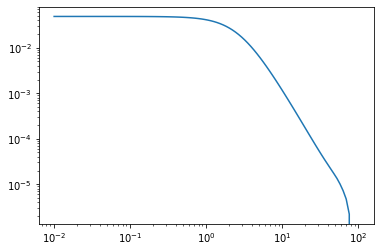

In [6]:
r, sx = cluster.get_xray_profile(output_type='R')
plt.loglog(r/cluster.D_ang, sx.to_value('s-1 arcmin-2'))

276.2654251453202 375.8976891061639


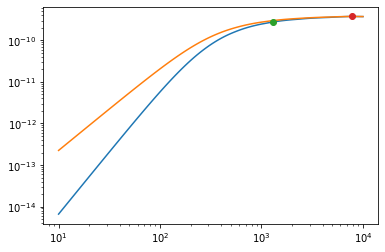

In [7]:
t = 'S'
radius = np.logspace(1,4,100)*u.kpc
fsph = cluster.get_xray_flux(Rmax=radius, Rmin=0.1*u.kpc, Rmin_los=0.1*u.kpc, output_type=t,type_integral='spherical')
fcyl = cluster.get_xray_flux(Rmax=radius, Rmin=0.1*u.kpc, Rmin_los=0.1*u.kpc, output_type=t,type_integral='cylindrical')

f500 = cluster.get_xray_flux(Rmax=cluster.R500, Rmin=0.1*u.kpc, Rmin_los=0.1*u.kpc, type_integral='spherical', output_type=t)
ftrunc = cluster.get_xray_flux(Rmax=cluster.R_truncation, Rmin=0.1*u.kpc, Rmin_los=0.1*u.kpc, type_integral='spherical', output_type=t)

plt.loglog(radius,fsph)
plt.loglog(radius,fcyl)
plt.loglog(cluster.R500, f500, 'o')
plt.loglog(cluster.R_truncation.to('kpc'), ftrunc, 'o')

print(f500.to_value('erg s-1 cm-2')*1e12, ftrunc.to_value('erg s-1 cm-2')*1e12)

In [8]:
# Get the model ymaps
FWHM = 5*u.arcmin
h = cluster.get_map_header()
m = cluster.get_xray_map(output_type='R')

FWHM2sigma = 1.0/(2.0*np.sqrt(2*np.log(2)))
m = ndimage.gaussian_filter(m, sigma=FWHM2sigma*FWHM.to_value('deg')/reso_out, order=0)*m.unit
xmap_s = ndimage.gaussian_filter(xmap, sigma=FWHM2sigma*np.sqrt(FWHM.to_value('deg')**2-(1.8/60)**2)/reso_out, order=0)

/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  if __name__ == '__main__':
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.


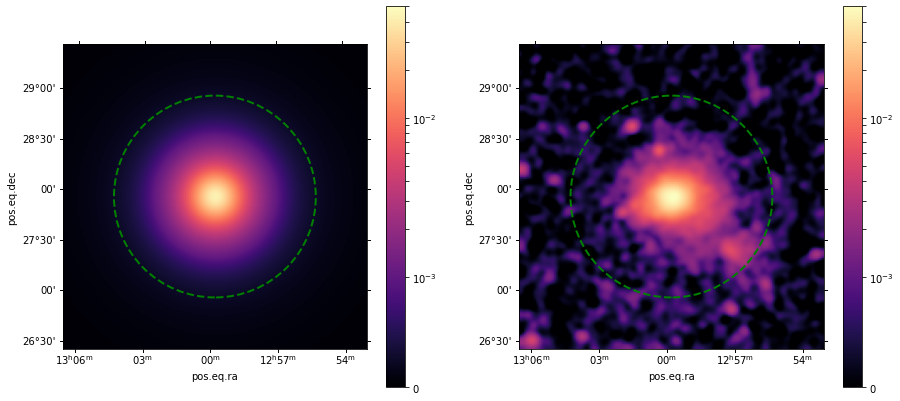

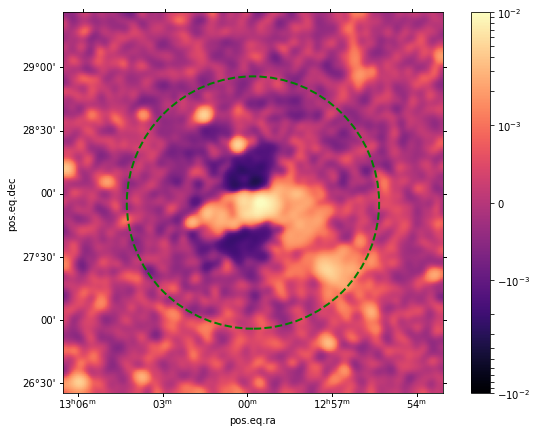

In [9]:
rad_show = 1.0
coeff = 5.24559/(hp.nside2resol(2048, arcmin=True)**2)
bkg = np.median(xmap*coeff - m.to_value('s-1 arcmin-2'))

fig = plt.figure(1, figsize=(15, 7))

# Model 1
ax1 = plt.subplot(121, projection=WCS(h))
plt.imshow(m.to_value('s-1 arcmin-2'), vmin=0, origin='lower', cmap='magma', norm=SymLogNorm(1e-3, vmin=0, vmax=5e-2))
circle_500 = matplotlib.patches.Ellipse((cluster.coord.ra.value, cluster.coord.dec.value),
                                        2*rad_show/np.cos(cluster.coord.dec.value*np.pi/180), 2*rad_show,
                                        linewidth=2, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax1.get_transform('fk5'))
ax1.add_patch(circle_500)
plt.colorbar()


# Data
ax2 = plt.subplot(122, projection=WCS(h))
plt.imshow(xmap_s*coeff-bkg, vmin=0, origin='lower', cmap='magma', norm=SymLogNorm(1e-3, vmin=0, vmax=5e-2))
circle_500 = matplotlib.patches.Ellipse((cluster.coord.ra.value, cluster.coord.dec.value),
                                        2*rad_show/np.cos(cluster.coord.dec.value*np.pi/180), 2*rad_show,
                                        linewidth=2, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax2.get_transform('fk5'))
ax2.add_patch(circle_500)
plt.colorbar()

# Data - model scaled
fig = plt.figure(2, figsize=(10, 7))
ax = plt.subplot(111, projection=WCS(h))
plt.imshow(xmap_s*coeff-bkg - m.to_value('s-1 arcmin-2'), cmap='magma', norm=SymLogNorm(1e-3, vmin=-1e-2, vmax=1e-2))
circle_500 = matplotlib.patches.Ellipse((cluster.coord.ra.value, cluster.coord.dec.value),
                                        2*rad_show/np.cos(cluster.coord.dec.value*np.pi/180), 2*rad_show,
                                        linewidth=2, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax.get_transform('fk5'))
ax.add_patch(circle_500)
plt.colorbar()

# Test impact of metalicity and EBL

0.25 dominguez
0.0 dominguez
0.0 none


/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


(10, 100)

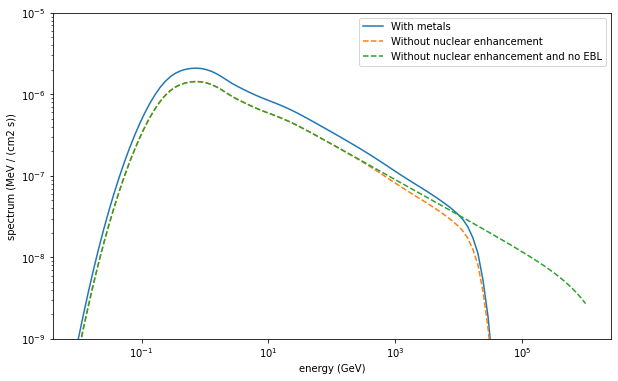

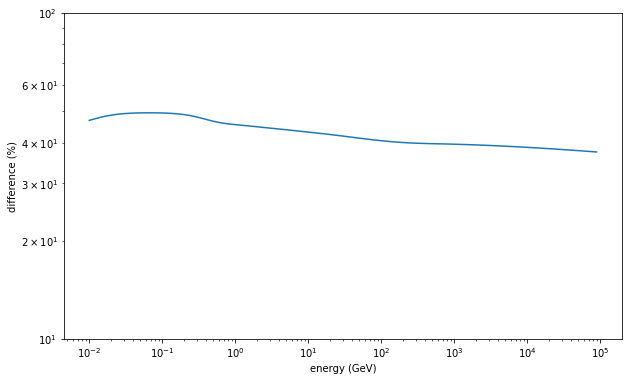

In [10]:
cluster = model.Cluster(silent=True)

cluster.abundance = 0.3
cluster.helium_mass_fraction = 0.25
e1, s1 = cluster.get_gamma_spectrum()
print(cluster.helium_mass_fraction, cluster._EBL_model)

cluster.abundance = 0.0
cluster.helium_mass_fraction = 0.0
e2, s2 = cluster.get_gamma_spectrum()
print(cluster.helium_mass_fraction, cluster._EBL_model)

cluster.abundance = 0.0
cluster.helium_mass_fraction = 0.0
cluster.EBL_model = 'none'
e3, s3 = cluster.get_gamma_spectrum()
print(cluster.helium_mass_fraction, cluster._EBL_model)

spec1 = (e1**2*s1).to('MeV cm-2 s-1')
spec2 = (e2**2*s2).to('MeV cm-2 s-1')
spec3 = (e3**2*s3).to('MeV cm-2 s-1')

fig = plt.figure(figsize=(10,6))
plt.loglog(e1, spec1, label='With metals')
plt.loglog(e2, spec2, '--', label='Without nuclear enhancement')
plt.loglog(e3, spec3, '--', label='Without nuclear enhancement and no EBL')
plt.ylabel('spectrum ('+str(spec1.unit)+')')
plt.xlabel('energy (GeV)')
plt.ylim(1e-9, 1e-5)
plt.legend()

fig = plt.figure(figsize=(10, 6))
plt.loglog(e1, (spec1-spec2)/spec2*100)
plt.ylabel('difference (%)')
plt.xlabel('energy (GeV)')
plt.ylim(10, 100)

# Test auto-plot tools

In [11]:
cluster = model.Cluster(silent=True)

In [12]:
cluster.output_dir = outdir
cluster.map_fov = 10*u.deg
cluster.plot()

# Test saving data

In [13]:
cluster = model.Cluster(silent=True)
cluster.output_dir = outdir

In [14]:
cluster.save_spectra()
cluster.save_profile()
cluster.save_map()

In [15]:
new_table = Table.read(cluster.output_dir+'/SPECTRA.fits')

In [16]:
new_table

Energy,CRp,CRe,gamma,gammaF,nu,nuF,IC,ICF
MeV,1 / MeV,1 / MeV,1 / (cm2 MeV s),1 / (cm2 s),1 / (cm2 MeV s),1 / (cm2 s),1 / (cm2 MeV s),1 / (cm2 s)
float64,float64,float64,float64,float64,float64,float64,float64,float64
10.0,0.0,2.965005862275951e+60,1.0355757528744154e-11,1.7122711220718202e-08,8.76964820029402e-12,1.4500232807989717e-08,9.48259401829751e-09,9.452478596503399e-08
12.328467394420658,0.0,2.901106820082262e+60,1.4725019338262397e-11,1.711152764608968e-08,1.2469704797612021e-11,1.4490762178183069e-08,6.234522726749494e-09,7.689823429863321e-08
15.199110829529339,0.0,2.8115703653104393e+60,2.018534795595531e-11,1.706873765393663e-08,1.709371814499401e-11,1.4454526023363297e-08,4.099089897900881e-09,6.238270672253238e-08
18.73817422860384,0.0,2.6877119232473028e+60,2.6489595040295618e-11,1.6982496170012855e-08,2.2432393654143184e-11,1.4381493484945877e-08,2.6951277265868208e-09,5.0479472411753684e-08
23.101297000831604,0.0,2.5302382957100764e+60,3.319561613422252e-11,1.6840144999115698e-08,2.811130663122427e-11,1.4260945038966e-08,1.772059498690461e-09,4.089418404424387e-08
28.48035868435802,0.0,2.317426206219034e+60,3.974371396486869e-11,1.665661801322931e-08,3.3656484199980965e-11,1.410552746816982e-08,1.1651545049837301e-09,3.322401855281489e-08
35.11191734215131,0.0,2.0545723099326785e+60,4.557821216070252e-11,1.6374373837433455e-08,3.859735853589427e-11,1.3866512424049146e-08,7.661152851639967e-10,2.6920326713904415e-08
43.28761281083057,0.0,1.749712157580058e+60,5.020934966633609e-11,1.5970746339664308e-08,4.2519181403884684e-11,1.352470536582563e-08,5.037431340283728e-10,2.176014704208856e-08


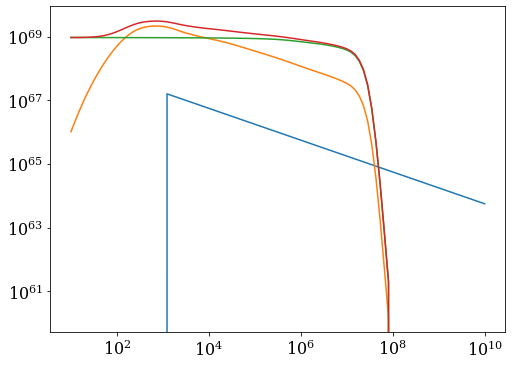

In [17]:
plt.loglog(new_table['Energy'], new_table['Energy']**2*new_table['CRp'])
plt.loglog(new_table['Energy'], new_table['Energy']**2*new_table['gamma']*1e75)
plt.loglog(new_table['Energy'], new_table['Energy']**2*new_table['IC']*1e75)
plt.loglog(new_table['Energy'], new_table['Energy']**2*(new_table['IC']+new_table['gamma'])*1e75)


# Test header from external data

In [18]:
cluster = model.Cluster(silent=True)
cluster.output_dir = outdir
hdul = fits.open('/Users/adam/Project/NIKA/Data/External_data/TaurusMainFilament/taurusN3-070.fits')
header = hdul[0].header
cluster.map_header = header
cluster.coord = SkyCoord("04h25m23.0s +27d03m18s", frame="icrs", unit="deg") # Perseus
cluster.save_map()

# Test saving/loading parameters

In [19]:
cluster.M500 = 1.1431e14*u.Msun
cluster.save_param()

In [20]:
cluster2 = model.Cluster()
cluster2.load_param(cluster.output_dir+'/parameters.pkl')
cluster2.print_param()

                                  _             _                         
                        _ __ ___ (_)_ __   ___ | |_                       
                       | '_ ` _ \| | '_ \ / _ \| __|                      
                       | | | | | | | | | | (_) | |_                       
                       |_| |_| |_|_|_| |_|\___/ \__|                      
Modeling of the ICM (Non-)thermal content and Observables prediction Tools
--------------------------------------------------------------------------
                                                                          
Setting gNFW Planck coll. (2013) UPP.
--- silent
    True
    <class 'bool'>
--- output_dir
    /Users/adam/Desktop/Test
    <class 'str'>
--- cosmo
    FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)
    <class 'astropy.cosmology.core.FlatLambdaCDM'>
--- name
    Cluster
    <class 'str'>
--- coord
    <SkyCoord (ICRS

In [21]:
cluster.print_param()

--- silent
    True
    <class 'bool'>
--- output_dir
    /Users/adam/Desktop/Test
    <class 'str'>
--- cosmo
    FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)
    <class 'astropy.cosmology.core.FlatLambdaCDM'>
--- name
    Cluster
    <class 'str'>
--- coord
    <SkyCoord (ICRS): (ra, dec) in deg
    (66.34583333, 27.055)>
    <class 'astropy.coordinates.sky_coordinate.SkyCoord'>
--- redshift
    0.01
    <class 'float'>
--- D_ang
    43.716402218267916 Mpc
    <class 'astropy.units.quantity.Quantity'>
--- D_lum
    44.5951019028551 Mpc
    <class 'astropy.units.quantity.Quantity'>
--- M500
    114310000000000.0 solMass
    <class 'astropy.units.quantity.Quantity'>
--- R500
    751.6040377011867 kpc
    <class 'astropy.units.quantity.Quantity'>
--- theta500
    0.9850705236506042 deg
    <class 'astropy.units.quantity.Quantity'>
--- R_truncation
    4646.032937090347 kpc
    <class 'astropy.units.quanti

# Test Gamma ray computation

In [22]:
cluster = model.Cluster(silent=True)
cluster.redshift = 0.012
cluster.map_fov = 10*u.deg
cluster.map_reso = 0.01*u.deg

In [23]:
m = cluster.get_gamma_map(Normalize=True)
header = cluster.get_map_header()

map_tools.get_map_norm(m.to_value('sr-1'), header)

1.0009092659344212

/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  after removing the cwd from sys.path.


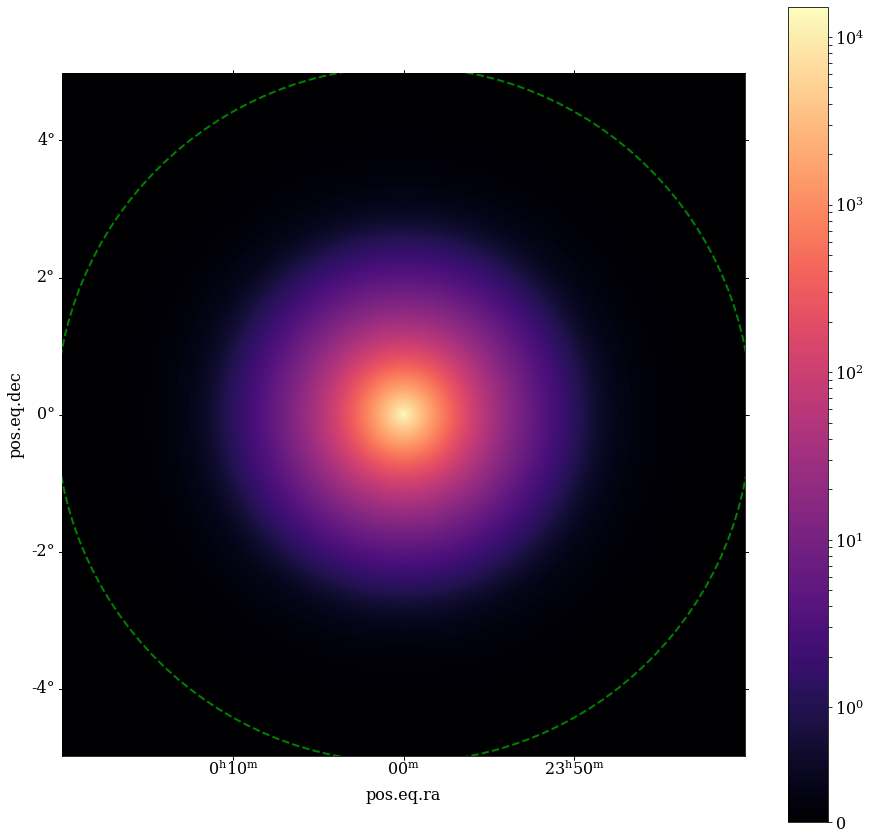

In [24]:
rad_show = cluster.theta_truncation.to_value('deg')
plt.figure(0, figsize=(15,15))
ax = plt.subplot(111, projection=WCS(header))
plt.imshow(m.to_value('sr-1'), vmin=0,origin='lower', cmap='magma', norm=SymLogNorm(1))
circle_500 = matplotlib.patches.Ellipse((cluster.coord.ra.value, cluster.coord.dec.value),
                                        2*rad_show/np.cos(cluster.coord.dec.value*np.pi/180), 2*rad_show,
                                        linewidth=2, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax.get_transform('fk5'))
ax.add_patch(circle_500)
plt.colorbar()

(1e-15, 1e-07)

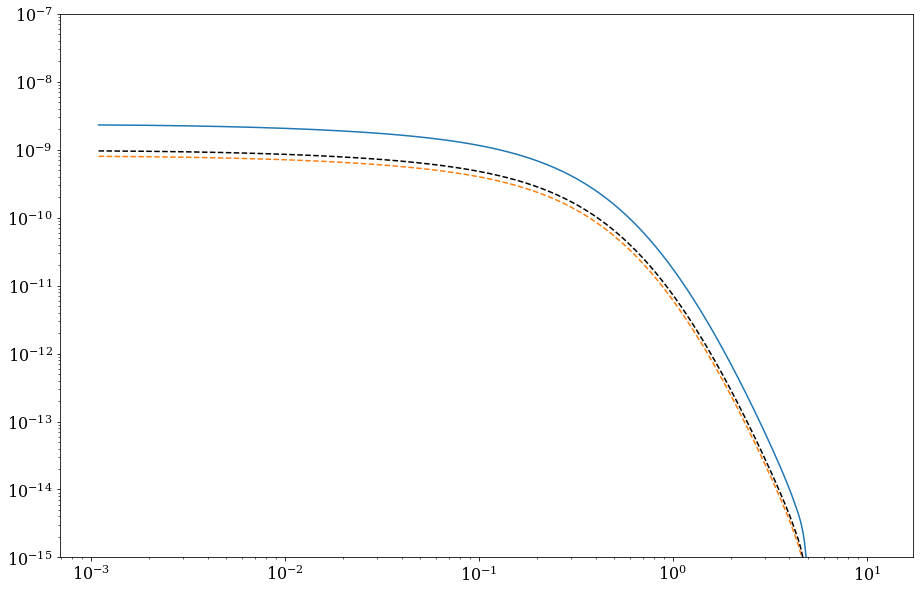

In [25]:
cluster.EBL_model = 'dominguez'
r1, p1 = cluster.get_gamma_profile(radius=np.logspace(0,4,1000)*u.kpc, 
                                 Emin=500*u.GeV, Emax=1*u.PeV, Energy_density=False)
r2, p2 = cluster.get_gamma_profile(radius=np.logspace(0,4,1000)*u.kpc, 
                                 Emin=1000*u.GeV, Emax=10*u.PeV, Energy_density=False)
cluster.EBL_model = 'none'
r3, p3 = cluster.get_gamma_profile(radius=np.logspace(0,4,1000)*u.kpc, 
                                 Emin=1000*u.GeV, Emax=10*u.PeV, Energy_density=False)

plt.figure(0,figsize=(15,10))
plt.loglog((r1/cluster.D_ang*u.rad).to('deg'),p1.to('cm-2 s-1 sr-1'), '-')
plt.loglog((r2/cluster.D_ang*u.rad).to('deg'),p2.to('cm-2 s-1 sr-1'), '--')
plt.loglog((r3/cluster.D_ang*u.rad).to('deg'),p3.to('cm-2 s-1 sr-1'), 'k--')
plt.ylim(1e-15, 1e-7)

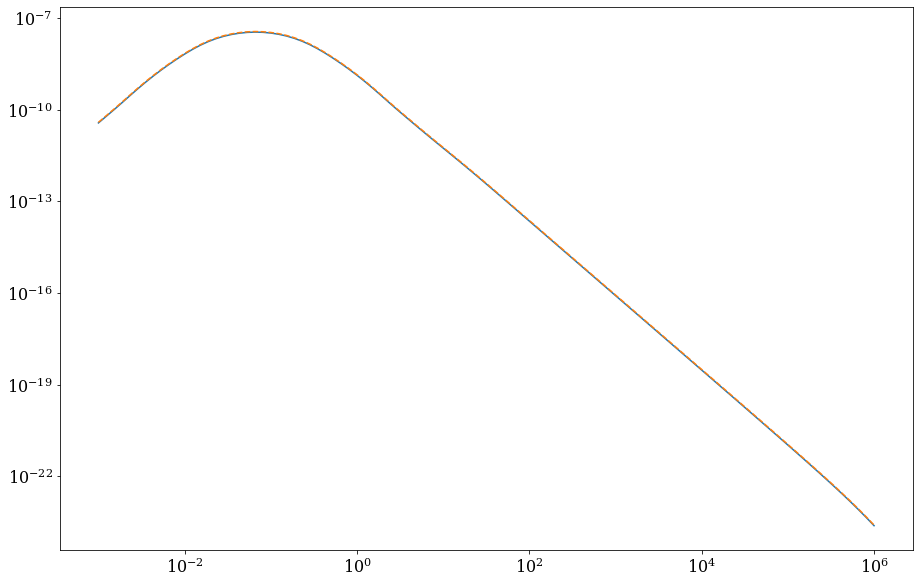

In [26]:
eng    = np.logspace(-3, 6, 100)*u.GeV
eng1, dN_dEdSdt1 = cluster.get_gamma_spectrum(eng, Rmax=1000*u.kpc, type_integral='spherical')
eng2, dN_dEdSdt2 = cluster.get_gamma_spectrum(eng, Rmax=1000*u.kpc, type_integral='cylindrical')

plt.figure(1,figsize=(15,10))
plt.loglog(eng1, dN_dEdSdt1, '')
plt.loglog(eng2, dN_dEdSdt2, '--')

In [4]:
# check that calculating the flux from spectrum and then profile is similar as the other way around
Emin = 10*u.MeV
Emax = 1*u.PeV
Rmax = cluster.R500

# Get the spectrum and integrate
energy=np.logspace(np.log10(Emin.to_value('GeV')),np.log10(Emax.to_value('GeV')),1000)*u.GeV
energy, dN_dEdSdt = cluster.get_gamma_spectrum(energy, Rmax=Rmax, type_integral='cylindrical')
flux1 = cluster_spectra.get_integral_any_model(energy.to_value('GeV'),
                                               dN_dEdSdt.to_value('GeV-1 cm-2 s-1'),#*energy.to_value('GeV'),
                                               Emin.to_value('GeV'), Emax.to_value('GeV')) * u.Unit('cm-2 s-1')

# Get the profile and integrate
r3d = cluster_profile.define_safe_radius_array(np.array([Rmax.to_value('kpc')]), Rmin=1.0)*u.kpc
r2d, dN_dSdtdO  = cluster.get_gamma_profile(r3d, Emin=Emin, Emax=Emax, Energy_density=False)

integrand = dN_dSdtdO.to_value('cm-2 s-1 sr-1') / cluster.D_ang.to_value('kpc')**2
flux2 = cluster_profile.get_surface_any_model(r2d.to_value('kpc'), integrand, Rmax.to_value('kpc'))*u.cm**-2*u.s**-1#*u.GeV
            
    
flux3 = cluster.get_gamma_flux(Rmax=Rmax, type_integral='cylindrical',
                       Emin=Emin, Emax=Emax, Energy_density=False)
    
flux1,flux2,flux3, (flux2-flux1)/flux2

(<Quantity 1.72993654e-08 1 / (cm2 s)>,
 <Quantity 1.7305079e-08 1 / (cm2 s)>,
 <Quantity 1.72914758e-08 1 / (cm2 s)>,
 <Quantity 0.00033017>)

In [17]:
conv = cluster.cosmo.kpc_proper_per_arcmin(cluster.redshift)

In [19]:
from minot.model_tools import trapz_loglog
cluster.X_cre1_E['X'] = 0
flux1 = cluster.get_synchrotron_flux(327*u.MHz, Rmin=10*u.kpc, Rmax=100*u.kpc, type_integral='cylindrical')
bid, flux2 = cluster.get_synchrotron_spectrum(np.array([327])*u.MHz,Rmin=10*u.kpc, Rmax=100*u.kpc, type_integral='cylindrical')
rad, prof = cluster.get_synchrotron_profile(np.logspace(1,2,100)*u.kpc, freq0=327*u.MHz)
flux3 = trapz_loglog(2*np.pi*(rad/conv).to_value('arcmin')*prof.to_value('Jy arcmin-2'), (rad/conv).to_value('arcmin'))

flux1, flux2, flux3

(<Quantity [9.38644958] Jy>, <Quantity [9.38644958] Jy>, 9.388126533397685)

# Test CRp model

In [30]:
cluster = model.Cluster()
cluster2 = model.Cluster()

                                  _             _                         
                        _ __ ___ (_)_ __   ___ | |_                       
                       | '_ ` _ \| | '_ \ / _ \| __|                      
                       | | | | | | | | | | (_) | |_                       
                       |_| |_| |_|_|_| |_|\___/ \__|                      
Modeling of the ICM (Non-)thermal content and Observables prediction Tools
--------------------------------------------------------------------------
                                                                          
Setting gNFW Planck coll. (2013) UPP.
                                  _             _                         
                        _ __ ___ (_)_ __   ___ | |_                       
                       | '_ ` _ \| | '_ \ / _ \| __|                      
                       | | | | | | | | | | (_) | |_                       
                       |_| |_| |_|_|_| |_|\___/ \__|          

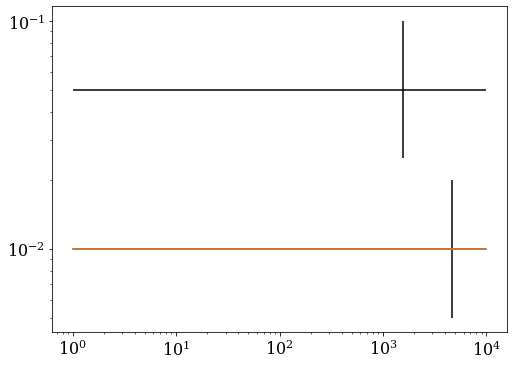

In [31]:
cluster.X_cr = {'X':1e-2, 'Rcut':cluster.R500*5}
cluster.X_cr = {'X':1e-2, 'Rcut':cluster.R_truncation}
cluster2.X_cr = {'X':5e-2, 'Rcut':cluster.R500}

#cluster.density_crp_model = {'name':'GNFW', 'a':cluster.pressure_gas_model['a'], 
#                             'b':cluster.pressure_gas_model['b'], 'c':cluster.pressure_gas_model['c'], 
#                             'r_p':cluster.pressure_gas_model['r_p']}
r, x = cluster.get_crp_to_thermal_energy_profile()
r2, x2 = cluster2.get_crp_to_thermal_energy_profile()
plt.loglog(r,x)
plt.loglog(r2,x2)
plt.hlines(cluster.X_cr['X'], 1,1e4)
plt.vlines(cluster.X_cr['Rcut'].to_value('kpc'), cluster.X_cr['X']/2,cluster.X_cr['X']*2)
plt.hlines(cluster2.X_cr['X'], 1,1e4)
plt.vlines(cluster2.X_cr['Rcut'].to_value('kpc'), cluster2.X_cr['X']/2,cluster2.X_cr['X']*2)

Setting spectrum_crp_model value
Setting spectrum_crp_model value


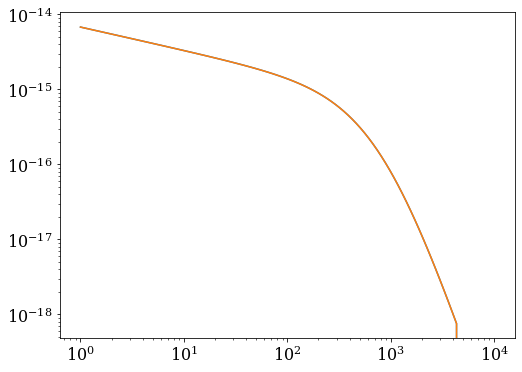

In [32]:
cluster.spectrum_crp_model = {'name':'PowerLaw', 'Index':1.0}
r1, n1 = cluster.get_density_crp_profile(Emin=0.1*u.TeV, Emax=10*u.PeV)
cluster.spectrum_crp_model = {'name':'PowerLaw', 'Index':1.0}
r2, n2 = cluster.get_density_crp_profile(Emin=0.1*u.TeV, Emax=100*u.PeV)
plt.loglog(r1, n1)
plt.loglog(r2, n2)

Setting spectrum_crp_model value
Setting spectrum_crp_model value
Setting spectrum_crp_model value


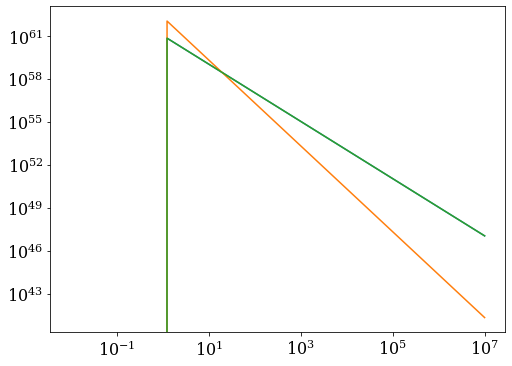

In [33]:
cluster.spectrum_crp_model = {'name':'PowerLaw', 'Index':2.0}
e1, s1 = cluster.get_crp_spectrum(Rmax=100*u.kpc)
cluster.spectrum_crp_model = {'name':'PowerLaw', 'Index':3.0}
e2, s2 = cluster.get_crp_spectrum(Rmax=100*u.kpc)
cluster.spectrum_crp_model = {'name':'PowerLaw', 'Index':2.0}

cluster.X_cr = {'X':cluster.X_cr['X'], 'Rcut':0.1*cluster.R500}
e3, s3 = cluster.get_crp_spectrum(Rmax=100*u.kpc)

plt.loglog(e1,s1)
plt.loglog(e2,s2)
plt.loglog(e3,s3)

In [34]:
cluster.density_crp_model

{'name': 'GNFW',
 'P_0': <Quantity 1. adu>,
 'c500': 1.81,
 'r_p': <Quantity 855.62300867 kpc>,
 'a': 1.33,
 'b': 4.13,
 'c': 0.31}

In [35]:
cluster.density_crp_model = {'name':'GNFW', 'P_0':1, 'a':1, 'b':1, 'c':1, 'r_p':100*u.kpc}
cluster.density_crp_model = {'name':'beta', 'n_0':1, 'beta':1, 'r_c':1*u.kpc}
cluster.density_crp_model = {'name':'doublebeta', 'beta1':1, 'beta2':1, 'r_c1':1*u.kpc, 'r_c2':1*u.kpc, 'n_01':1.0, 'n_02':1.0}
cluster.density_crp_model = {'name':'SVM', 'n_0':1, 'beta':1, 'alpha':1, 'gamma':1, 'epsilon':1, 'r_c':1*u.kpc, 'r_s':1.0*u.kpc}

Setting density_crp_model value
Fixing: R500
Setting density_crp_model value
Fixing: R500
Setting density_crp_model value
Fixing: R500
Setting density_crp_model value
Fixing: R500


In [36]:
cluster.density_crp_model

{'name': 'SVM',
 'n_0': <Quantity 1. adu>,
 'r_c': <Quantity 1. kpc>,
 'r_s': <Quantity 1. kpc>,
 'alpha': 1,
 'beta': 1,
 'gamma': 1,
 'epsilon': 1}

In [37]:
cluster.spectrum_crp_model = {'name':'PowerLaw', 'Index':1.0}
cluster.spectrum_crp_model = {'name':'ExponentialCutoffPowerLaw', 'Index':1.0, 'CutoffEnergy':1e3*u.TeV}

Setting spectrum_crp_model value
Setting spectrum_crp_model value


In [38]:
cluster.spectrum_crp_model

{'name': 'ExponentialCutoffPowerLaw',
 'Index': 1.0,
 'CutoffEnergy': <Quantity 1000. TeV>}

Setting density_crp_model value
Fixing: R500


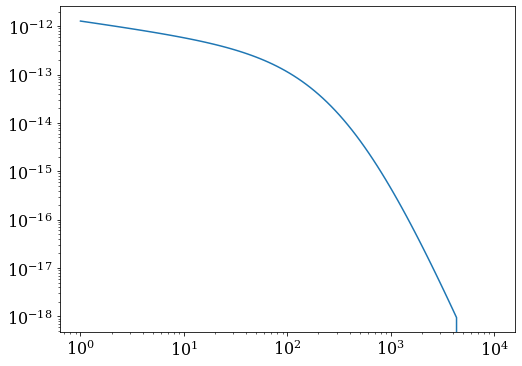

In [40]:
cluster.density_crp_model = {'name':'GNFW', 'P_0':1,'a':1.0, 'b': 5.0, 'c':0.3, 'r_p':400*u.kpc}

r, fr = cluster.get_density_crp_profile()
plt.loglog(r, fr)

Setting spectrum_crp_model value
Setting Epmax value


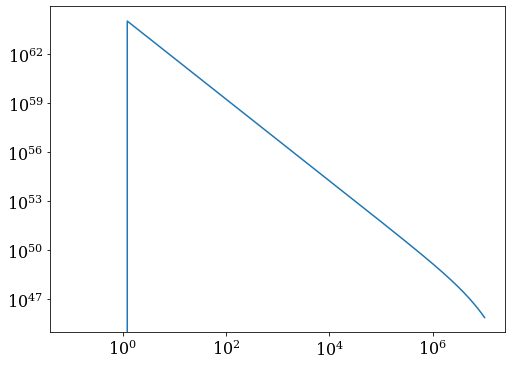

In [42]:
#cluster.spectrum_crp_model = {'name':'PowerLaw', 'Index':2.5}
cluster.spectrum_crp_model = {'name':'ExponentialCutoffPowerLaw', 'Index':2.5, 'CutoffEnergy':5.0*u.PeV}
cluster.Epmax = 10*u.PeV
e, fe = cluster.get_crp_spectrum(np.logspace(-1,7,1000)*u.GeV)
plt.loglog(e, fe)

<Quantity [5.17217946e+63] erg>

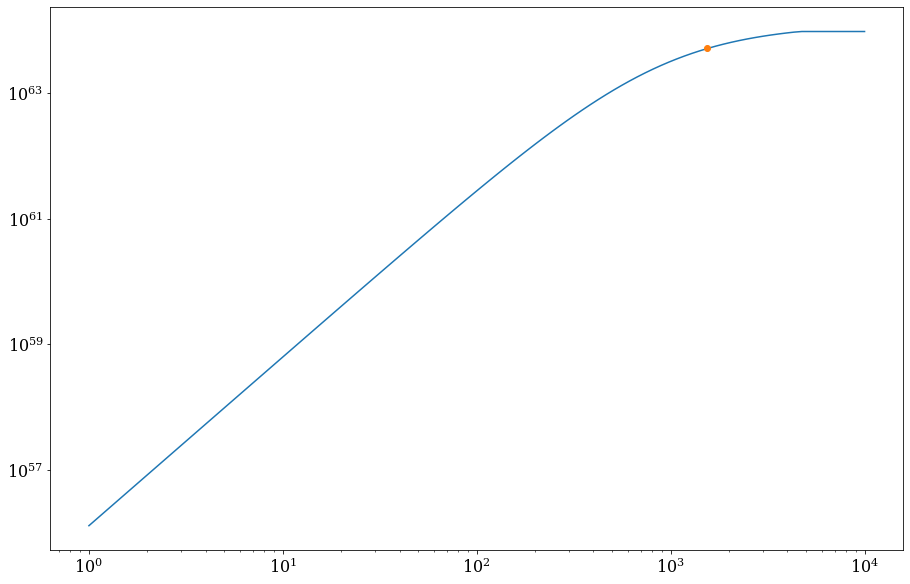

In [43]:
r, uth = cluster.get_thermal_energy_profile()
rl, uthl = cluster.get_thermal_energy_profile(cluster.R500)

plt.figure(figsize=(15,10))
plt.loglog(r, uth.to('erg'))
plt.loglog(rl, uthl.to('erg'), 'o')
uthl.to('erg')

# Test pressure, density, temperature profiles

In [44]:
cluster = model.Cluster()

                                  _             _                         
                        _ __ ___ (_)_ __   ___ | |_                       
                       | '_ ` _ \| | '_ \ / _ \| __|                      
                       | | | | | | | | | | (_) | |_                       
                       |_| |_| |_|_|_| |_|\___/ \__|                      
Modeling of the ICM (Non-)thermal content and Observables prediction Tools
--------------------------------------------------------------------------
                                                                          
Setting gNFW Planck coll. (2013) UPP.


In [45]:
# pressure profile
cluster = model.Cluster()
#cluster.R_truncation = np.inf*u.kpc
r1, p_r1 = cluster.get_pressure_gas_profile()
cluster.set_pressure_gas_gNFW_param('A10UPP')
r2, p_r2 = cluster.get_pressure_gas_profile()
cluster.set_pressure_gas_gNFW_param('A10MD')
r3, p_r3 = cluster.get_pressure_gas_profile()
cluster.set_pressure_gas_gNFW_param('A10CC')
r4, p_r4 = cluster.get_pressure_gas_profile()
cluster.set_pressure_gas_gNFW_param('P13UPP')
r5, p_r5 = cluster.get_pressure_gas_profile()

cluster.theta500 = 0.1*u.deg
print(cluster.R500, cluster.M500)
cluster.set_pressure_gas_gNFW_param('P13UPP')
r6, p_r6 = cluster.get_pressure_gas_profile()

cluster.R_truncation = np.inf*u.kpc
r7, p_r7 = cluster.get_pressure_gas_profile()

cluster.pressure_gas_model = {'name':'GNFW', 'P_0':1*u.Unit('keV cm-3'), 'a':2.0,'b':5.0,'c':0.0, 'r_p':500.0*u.kpc}
r8, p_r8 = cluster.get_pressure_gas_profile()

cluster.set_pressure_gas_isoT_param(10*u.keV)
r9, p_r9 = cluster.get_pressure_gas_profile()

                                  _             _                         
                        _ __ ___ (_)_ __   ___ | |_                       
                       | '_ ` _ \| | '_ \ / _ \| __|                      
                       | | | | | | | | | | (_) | |_                       
                       |_| |_| |_|_|_| |_|\___/ \__|                      
Modeling of the ICM (Non-)thermal content and Observables prediction Tools
--------------------------------------------------------------------------
                                                                          
Setting gNFW Planck coll. (2013) UPP.
Setting gNFW Arnaud et al. (2010) UPP.
Setting gNFW Arnaud et al. (2010) morphologically disturbed.
Setting gNFW Arnaud et al. (2010) cool-core.
Setting gNFW Planck coll. (2013) UPP.
Setting theta500 value
Setting: R500, M500 ; Fixing: redshift, cosmo, D_ang
0.0762995155834928 Mpc 119586526957.30626 solMass
Setting gNFW Planck coll. (2013) UPP.
Setting R_trunc

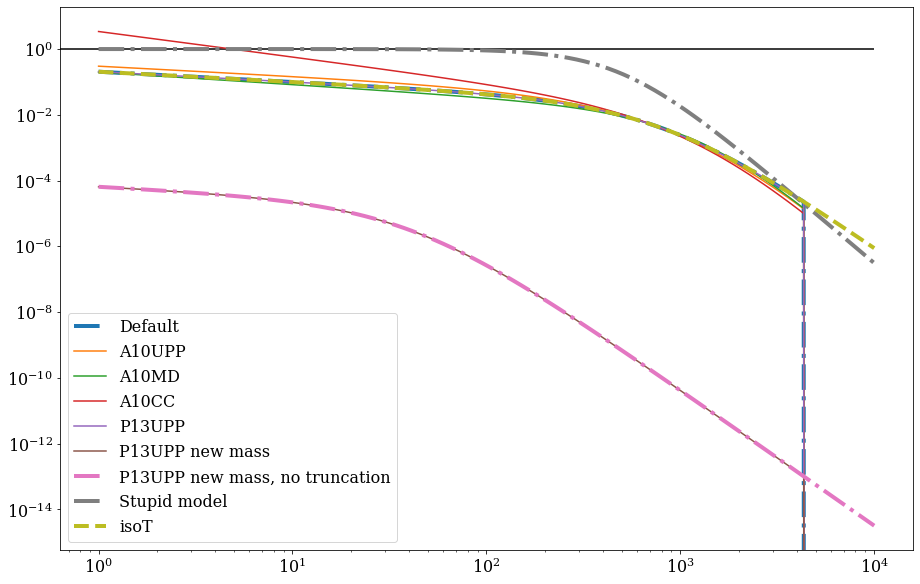

In [46]:
plt.figure(figsize=(15,10))
plt.loglog(r1, p_r1, '-.', linewidth=4, label='Default')
plt.loglog(r2, p_r2, label='A10UPP')
plt.loglog(r3, p_r3, label='A10MD')
plt.loglog(r4, p_r4, label='A10CC')
plt.loglog(r5, p_r5, label='P13UPP')
plt.loglog(r6, p_r6, label='P13UPP new mass')
plt.loglog(r7, p_r7, '-.', linewidth=4, label='P13UPP new mass, no truncation')
plt.loglog(r8, p_r8, '-.', linewidth=4, label='Stupid model')
plt.loglog(r9, p_r9, '--', linewidth=4, label='isoT')
plt.hlines(1,0,1e4)
plt.legend()

In [47]:
cluster.density_gas_model = {'name':'doublebeta', 
                             'n_01':1e-2*u.Unit('cm-3'), 'beta1':2.0, 'r_c1':500.0*u.kpc,
                             'n_02':1e-2*u.Unit('cm-3'), 'beta2':2.0, 'r_c2':500.0*u.kpc}
print(cluster.density_gas_model)

cluster.density_gas_model = {'name':'SVM', 
                            'n_0':1.0*u.cm**-3,'beta':1,'r_c':100*u.kpc,'r_s':1*u.kpc, 
                             'alpha':1, 'gamma':1, 'epsilon':1}
print(cluster.density_gas_model)

Setting density_gas_model value
Fixing: R500
{'name': 'doublebeta', 'n_01': <Quantity 0.01 1 / cm3>, 'r_c1': <Quantity 500. kpc>, 'beta1': 2.0, 'n_02': <Quantity 0.01 1 / cm3>, 'r_c2': <Quantity 500. kpc>, 'beta2': 2.0}
Setting density_gas_model value
Fixing: R500
{'name': 'SVM', 'n_0': <Quantity 1. 1 / cm3>, 'r_c': <Quantity 100. kpc>, 'r_s': <Quantity 1. kpc>, 'alpha': 1, 'beta': 1, 'gamma': 1, 'epsilon': 1}


In [48]:
cluster.R_truncation = 2500*u.kpc

cluster.density_gas_model = {'name':'doublebeta', 
                             'n_01':1e-2*u.Unit('cm-3'), 'beta1':2.0, 'r_c1':100.0*u.kpc,
                             'n_02':1e-3*u.Unit('cm-3'), 'beta2':0.5, 'r_c2':500.0*u.kpc}
r1, n_r1 = cluster.get_density_gas_profile()

cluster.density_gas_model = {'name':'beta', 
                             'n_0':1e-3*u.Unit('cm-3'), 'beta':0.5, 'r_c':500.0*u.kpc}
r2, n_r2 = cluster.get_density_gas_profile()

cluster.density_gas_model = {'name':'SVM', 
                            'n_0':1e-3*u.cm**-3,'beta':0.5,'r_c':500*u.kpc,'r_s':5000*u.kpc, 
                             'alpha':0.3, 'gamma':3, 'epsilon':15.0}
r3, n_r3 = cluster.get_density_gas_profile()

Setting R_truncation value
Setting: theta_truncation ; Fixing: D_ang
Setting density_gas_model value
Fixing: R500
Setting density_gas_model value
Fixing: R500
Setting density_gas_model value
Fixing: R500


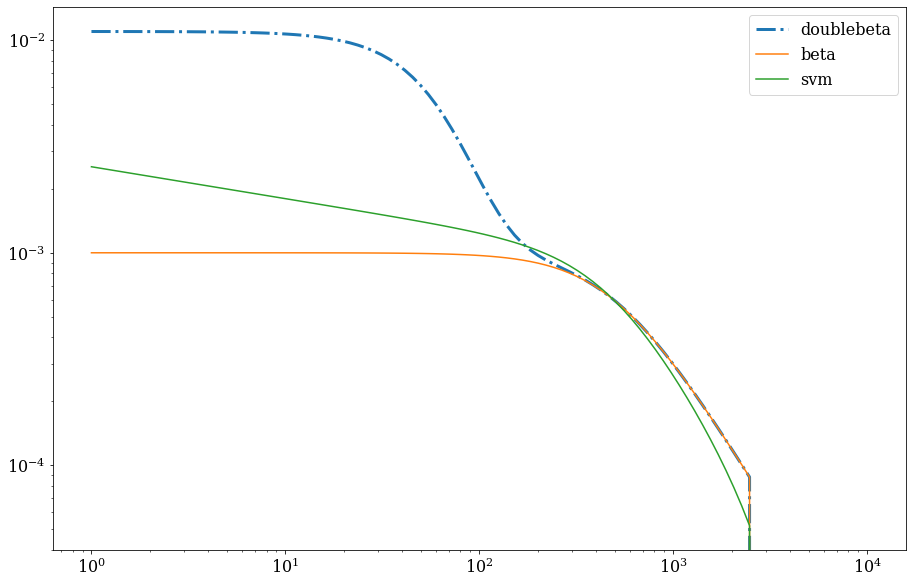

In [49]:
plt.figure(figsize=(15,10))
plt.loglog(r1, n_r1, '-.', linewidth=3, label='doublebeta')
plt.loglog(r2, n_r2, label='beta')
plt.loglog(r3, n_r3, label='svm')
plt.legend()

In [50]:
cluster.set_pressure_gas_gNFW_param('P13UPP')

r1, T_r1 = cluster.get_temperature_gas_profile()
cluster.density_gas_model = {'name':'doublebeta', 
                             'n_01':1e-1*u.Unit('cm-3'), 'beta1':1.5, 'r_c1':50.0*u.kpc,
                             'n_02':1e-3*u.Unit('cm-3'), 'beta2':0.5, 'r_c2':500.0*u.kpc}
cluster.set_pressure_gas_gNFW_param('A10MD')
r2, T_r2 = cluster.get_temperature_gas_profile()

Setting gNFW Planck coll. (2013) UPP.
Setting density_gas_model value
Fixing: R500
Setting gNFW Arnaud et al. (2010) morphologically disturbed.


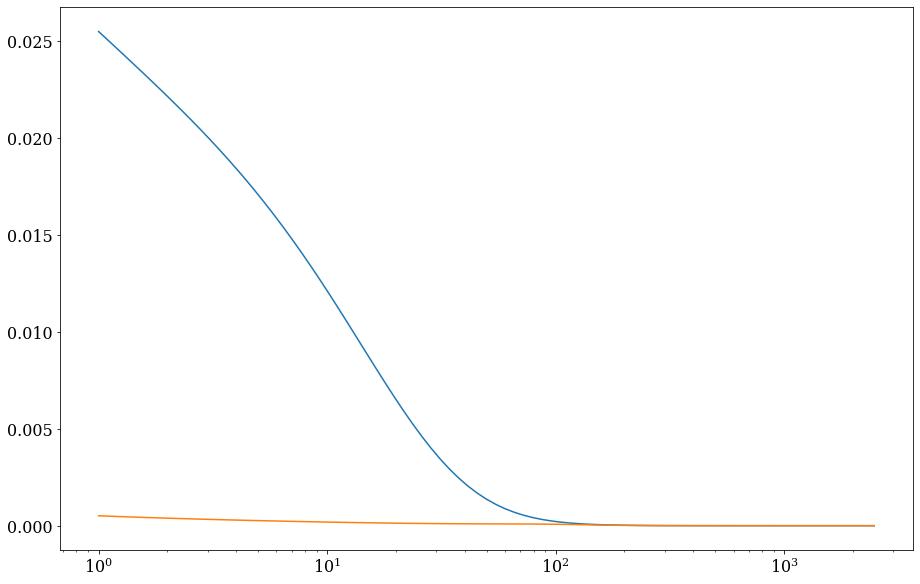

In [51]:
plt.figure(figsize=(15,10))
plt.plot(r1, T_r1)
plt.plot(r2, T_r2)
plt.xscale('log')

# Derived mass and integrated quantities

In [52]:
cluster = model.Cluster()
cluster.R_truncation = 5000.0*u.kpc#np.inf*u.kpc
print(cluster.R500)
print(cluster.M500)

                                  _             _                         
                        _ __ ___ (_)_ __   ___ | |_                       
                       | '_ ` _ \| | '_ \ / _ \| __|                      
                       | | | | | | | | | | (_) | |_                       
                       |_| |_| |_|_|_| |_|\___/ \__|                      
Modeling of the ICM (Non-)thermal content and Observables prediction Tools
--------------------------------------------------------------------------
                                                                          
Setting gNFW Planck coll. (2013) UPP.
Setting R_truncation value
Setting: theta_truncation ; Fixing: D_ang
1548.6776456967825 kpc
1000000000000000.0 solMass


In [53]:
cluster.set_pressure_gas_gNFW_param('A10CC')
cluster.density_gas_model = {'name':'SVM', 
                             'n_0':3e-2*u.cm**-3,'beta':0.0,'r_c':50.0*u.kpc,'r_s':500.0*u.kpc, 
                             'alpha':0.8, 'gamma':1.0, 'epsilon':6.0}

Setting gNFW Arnaud et al. (2010) cool-core.
Setting density_gas_model value
Fixing: R500


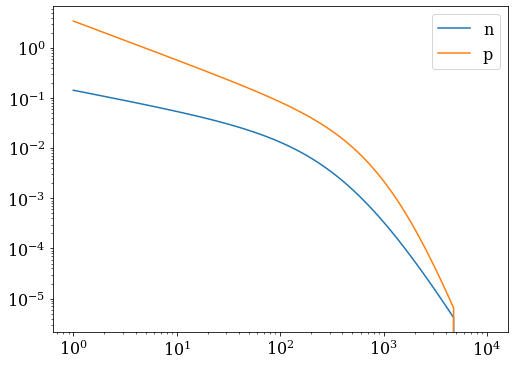

In [54]:
r,p = cluster.get_pressure_gas_profile()
r,n = cluster.get_density_gas_profile()
plt.loglog(r, n, label='n')
plt.loglog(r,p, label='p')
plt.legend()

In [55]:
r, mhse = cluster.get_hse_mass_profile()

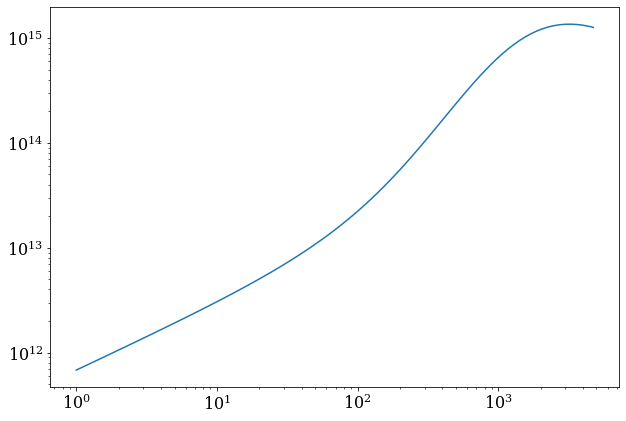

In [56]:
plt.figure(figsize=(10,7))
plt.plot(r, mhse)
plt.xscale('log')
plt.yscale('log')

Setting R_truncation value
Setting: theta_truncation ; Fixing: D_ang
The truncation was reached before R200
nan solMass


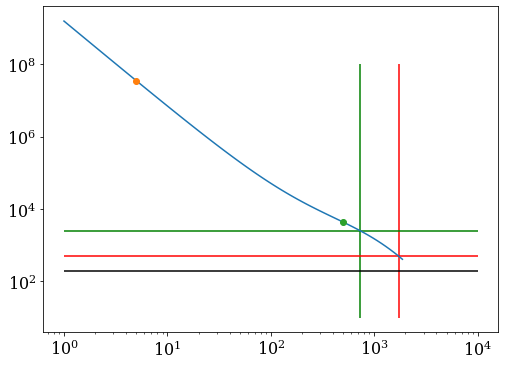

In [57]:
cluster.R_truncation = 2000.0*u.kpc#np.inf*u.kpc

r, delta = cluster.get_overdensity_contrast_profile()
r1, delta1 = cluster.get_overdensity_contrast_profile(5*u.kpc)
r2, delta2 = cluster.get_overdensity_contrast_profile(500*u.kpc)
r2500_p, m2500_p = cluster.get_mdelta_from_profile(2500, 10*u.kpc, 1e5*u.kpc)
r500_p, m500_p = cluster.get_mdelta_from_profile(500, 10*u.kpc, 1e4*u.kpc)
r200_p, m200_p = cluster.get_mdelta_from_profile(200, 10*u.kpc, 1e5*u.kpc)
plt.loglog(r, delta)
plt.loglog(r1, delta1, 'o')
plt.loglog(r2, delta2, 'o')
plt.vlines(r2500_p.to_value('kpc'), 10, 1e8, color='g')
plt.vlines(r500_p.to_value('kpc'), 10, 1e8, color='r')
plt.vlines(r200_p.to_value('kpc'), 10, 1e8)
plt.hlines(2500, 1e0, 1e4, color='g')
plt.hlines(500, 1e0, 1e4, color='r')
plt.hlines(200, 1e0, 1e4)
print(m200_p)

(100000000.0, 100000000000.0)

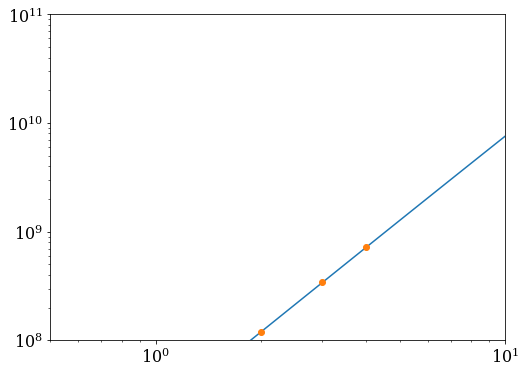

In [58]:
r, mgas = cluster.get_gas_mass_profile()
r1, mgas1 = cluster.get_gas_mass_profile([1,2,3,4]*u.kpc)
plt.loglog(r, mgas)
plt.loglog(r1, mgas1, 'o')
plt.xlim(0.5,10)
plt.ylim(1e8,1e11)

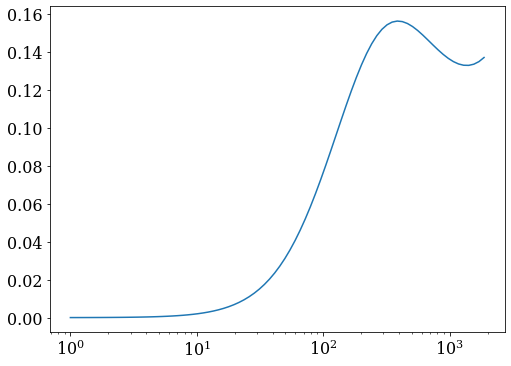

In [59]:
r, fgas = cluster.get_fgas_profile()
plt.plot(r, fgas)
plt.xscale('log')

In [60]:
r,n = cluster.get_density_gas_profile(100.0*u.kpc)
print(r, n)

[100.] kpc [0.01315726] 1 / cm3


# Compton parameter

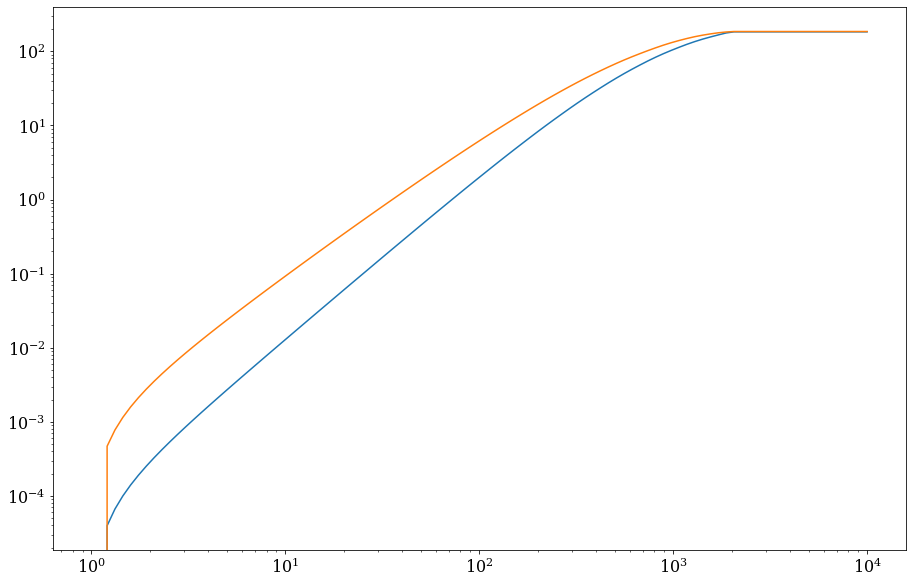

In [61]:
r = np.logspace(0,4,100)*u.kpc
plt.figure(figsize=(15,10))
ysph = cluster.get_sz_flux(Rmax=r, Compton_only=True, type_integral='spherical')
ycyl = cluster.get_sz_flux(Rmax=r, Compton_only=True, type_integral='cylindrical')
plt.loglog(r, ysph)
plt.loglog(r, ycyl)

/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


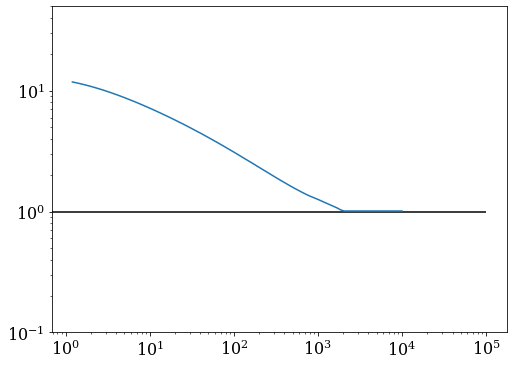

In [62]:
plt.plot(r, ycyl/ysph)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.1,50)
plt.hlines(1,0,1e5)

1548.6776456967825 kpc
Setting R_truncation value
Setting: theta_truncation ; Fixing: D_ang


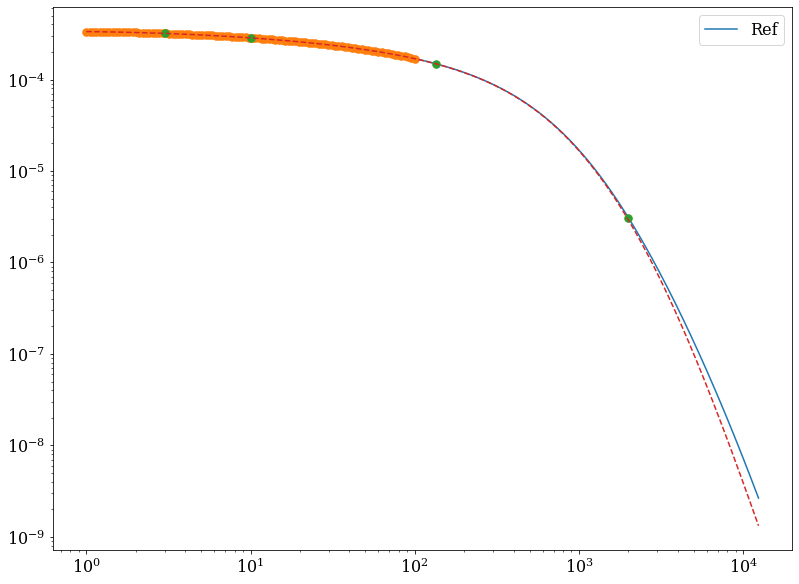

In [63]:
print(cluster.R500)
cluster.R_truncation = np.inf*u.kpc
Rp, y = cluster.get_sz_profile(np.logspace(0,np.log10(8*cluster.R500.to_value('kpc')),1000)*u.kpc, Compton_only=True)
Rp3, y3 = cluster.get_sz_profile(np.logspace(0,np.log10(8*cluster.R500.to_value('kpc')),1000)*u.kpc,NR500_los=2, Compton_only=True)
Rp1, y1 = cluster.get_sz_profile(np.logspace(0,2, 100)*u.kpc,Compton_only=True)
Rp2, y2 = cluster.get_sz_profile([3,10,135,2000]*u.kpc,Compton_only=True)
plt.figure(figsize=(13,10))
plt.plot(Rp, y, label='Ref')
plt.plot(Rp1, y1, '.', markersize=15)
plt.plot(Rp2, y2, '.', markersize=15)
plt.plot(Rp3, y3, '--', markersize=15)
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [64]:
r, m = cluster.get_gas_mass_profile()
r2, m2 = cluster.get_gas_mass_profile(600*u.kpc)

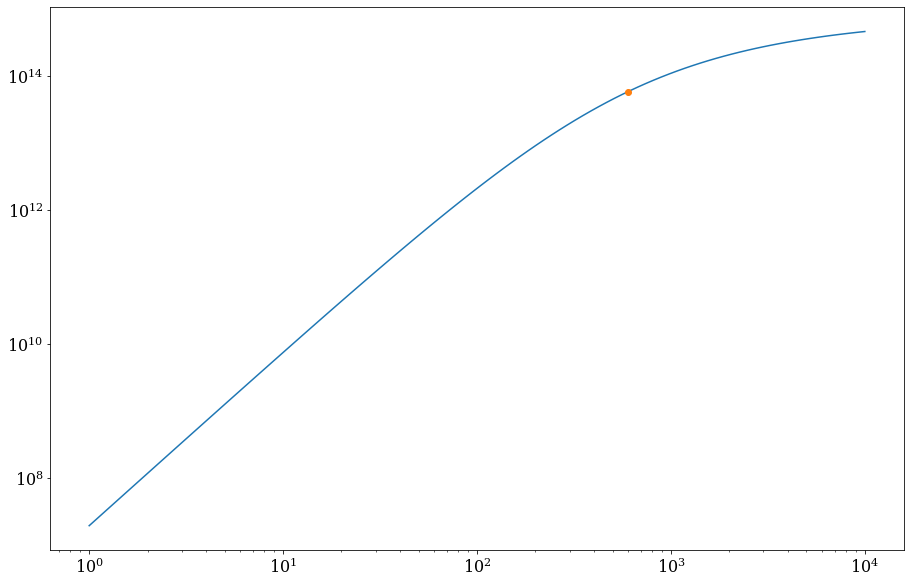

In [65]:
plt.figure(figsize=(15,10))
plt.loglog(r, m)
plt.loglog(r2, m2, 'o')

In [66]:
r, m = cluster.get_fgas_profile()
r2,m2 = cluster.get_fgas_profile(600*u.kpc)
r3,m3 = cluster.get_fgas_profile(1200*u.kpc)

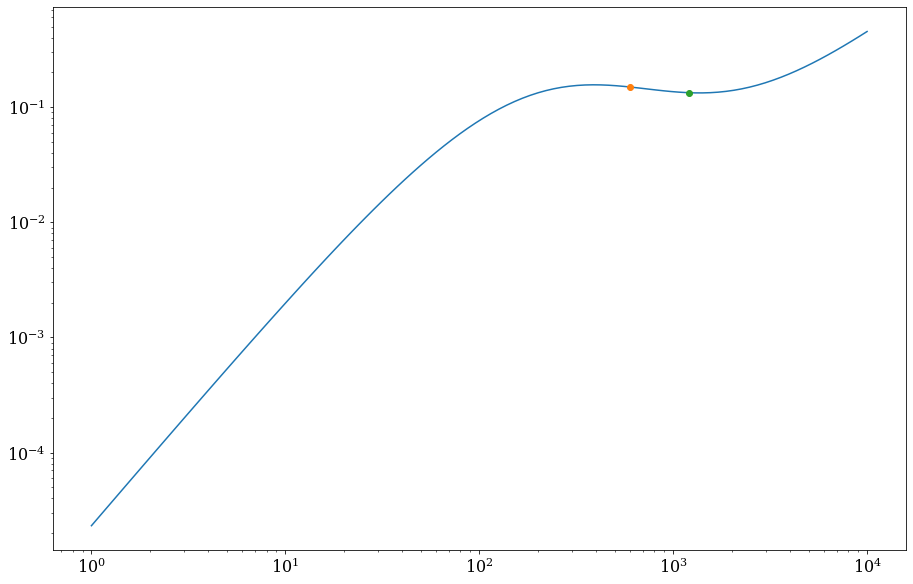

In [67]:
plt.figure(figsize=(15,10))
plt.loglog(r, m)
plt.loglog(r2, m2, 'o')
plt.loglog(r3, m3, 'o')

# Maps

In [68]:
# Extract a map as template

reso_out = 1.0/60          # Pixel size in deg
FoV_out  = 6.0             # Size of the field of view
coord1    = SkyCoord("03h19m47.2s +41d30m47s", frame="icrs", unit="deg") # Perseus
coord2    = SkyCoord("194.953d  27.9806d", frame="icrs", unit="deg") # Coma

dat_dir = os.getenv('CTAPHYS_EDAT_DIR')
ymap_file  = dat_dir+'/Planck/COM_CompMap_Compton-SZMap-milca-ymaps_2048_R2.00.fits'
ymap1, header1 = map_tools.roi_extract_healpix(ymap_file, coord1.ra.value, coord1.dec.value, 
                                   reso_out, [FoV_out, FoV_out], visu=False)
ymap2, header2 = map_tools.roi_extract_healpix(ymap_file, coord2.ra.value, coord2.dec.value, 
                                   reso_out, [FoV_out, FoV_out], visu=False)
FWHM2sigma = 1.0/(2.0*np.sqrt(2*np.log(2)))
sm = 5.0
ymap1 = ndimage.gaussian_filter(ymap1, sigma=(FWHM2sigma*sm/60/reso_out, FWHM2sigma*sm/60/reso_out), order=0)
ymap2 = ndimage.gaussian_filter(ymap2, sigma=(FWHM2sigma*sm/60/reso_out, FWHM2sigma*sm/60/reso_out), order=0)

/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/healpy/fitsfunc.py:426: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please ex

In [69]:
# Model Perseus
cluster1 = model.Cluster()
cluster1.R_truncation = np.inf*u.kpc
cluster1.M500 = 7e14*u.Msun
cluster1.redshift = 0.0179
cluster1.coord = {'RA':coord1.ra, 'Dec':coord1.dec}
cluster1.set_pressure_gas_gNFW_param('P13UPP')

#cluster1.map_coord = coord1
#cluster1.map_reso = reso_out*u.deg
#cluster1.map_fov = [FoV_out, FoV_out]*u.deg
cluster1.map_header = header1

# Model Coma
cluster2 = model.Cluster()
cluster2.R_truncation = np.inf*u.kpc
cluster2.M500 = 6e14*u.Msun
cluster2.redshift = 0.023
cluster2.coord = {'RA':coord2.ra, 'Dec':coord2.dec}
cluster2.set_pressure_gas_gNFW_param('P13UPP')

#cluster2.map_coord = coord2
#cluster2.map_reso = reso_out*u.deg
#cluster2.map_fov = [FoV_out, FoV_out]*u.deg
cluster2.map_header = header2

                                  _             _                         
                        _ __ ___ (_)_ __   ___ | |_                       
                       | '_ ` _ \| | '_ \ / _ \| __|                      
                       | | | | | | | | | | (_) | |_                       
                       |_| |_| |_|_|_| |_|\___/ \__|                      
Modeling of the ICM (Non-)thermal content and Observables prediction Tools
--------------------------------------------------------------------------
                                                                          
Setting gNFW Planck coll. (2013) UPP.
Setting R_truncation value
Setting: theta_truncation ; Fixing: D_ang
Setting M500 value
Setting: R500, theta500 ; Fixing: redshift, cosmo, D_ang
Setting redshift value
Setting: D_ang, D_lum, R500, theta500, theta_truncation ; Fixing: cosmo.
Setting coord value
Setting gNFW Planck coll. (2013) UPP.
Setting the map header
Setting: map_coord, map_reso, map_fov to

In [70]:
# Get the model ymaps
h1 = cluster1.get_map_header()
y1 = cluster1.get_sz_map(Compton_only=True)
h2 = cluster2.get_map_header()
y2 = cluster2.get_sz_map(Compton_only=True)

FWHM2sigma = 1.0/(2.0*np.sqrt(2*np.log(2)))
sm = np.sqrt(5.0**2 + 10.0**2)
y1 = ndimage.gaussian_filter(y1.value, sigma=(FWHM2sigma*sm/60/reso_out, FWHM2sigma*sm/60/reso_out), order=0)*y1.unit
y2 = ndimage.gaussian_filter(y2.value, sigma=(FWHM2sigma*sm/60/reso_out, FWHM2sigma*sm/60/reso_out), order=0)*y2.unit

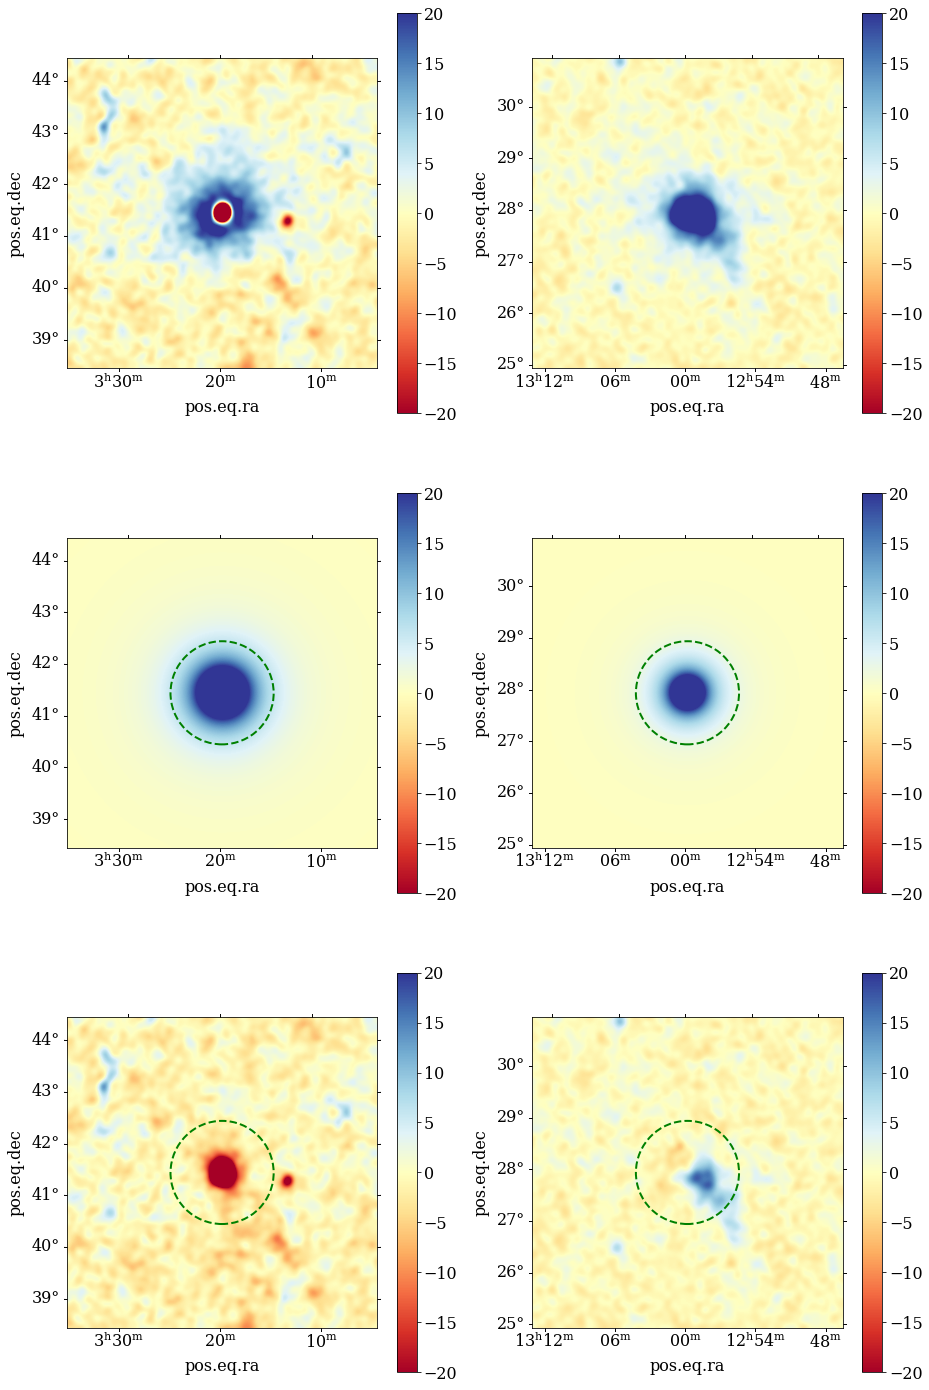

In [71]:
rad_show = 1.0

fig = plt.figure(1, figsize=(15, 25))

# Perseus
ax5 = plt.subplot(321, projection=WCS(header1))
plt.imshow(1e6*ymap1, vmin=-20, vmax=20, origin='lower', cmap='RdYlBu')
circle_500 = matplotlib.patches.Ellipse((coord1.ra.value, coord1.dec.value),
                                        2*rad_show/np.cos(coord1.dec.value*np.pi/180), 2*rad_show,
                                        linewidth=2, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax1.get_transform('fk5'))
ax1.add_patch(circle_500)
plt.colorbar()

# Coma
ax6 = plt.subplot(322, projection=WCS(header2))
plt.imshow(1e6*ymap2, vmin=-20, vmax=20, origin='lower', cmap='RdYlBu')
circle_500 = matplotlib.patches.Ellipse((coord2.ra.value, coord2.dec.value),
                                        2*rad_show/np.cos(coord2.dec.value*np.pi/180),2*rad_show,
                                        linewidth=2, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax2.get_transform('fk5'))
ax2.add_patch(circle_500)
plt.colorbar()

# Model 1
ax1 = plt.subplot(323, projection=WCS(h1))
plt.imshow(1e6*y1, vmin=-20, vmax=20, origin='lower', cmap='RdYlBu')
circle_500 = matplotlib.patches.Ellipse((cluster1.coord.ra.value, cluster1.coord.dec.value),
                                        2*rad_show/np.cos(cluster1.coord.dec.value*np.pi/180), 2*rad_show,
                                        linewidth=2, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax1.get_transform('fk5'))
ax1.add_patch(circle_500)
plt.colorbar()

# Model 2
ax2 = plt.subplot(324, projection=WCS(h2))
plt.imshow(1e6*y2, vmin=-20, vmax=20, origin='lower', cmap='RdYlBu')
circle_500 = matplotlib.patches.Ellipse((cluster2.coord.ra.value, cluster2.coord.dec.value),
                                        2*rad_show/np.cos(cluster2.coord.dec.value*np.pi/180), 2*rad_show,
                                        linewidth=2, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax2.get_transform('fk5'))
ax2.add_patch(circle_500)
plt.colorbar()

# Model 1 - Perseus
ax3 = plt.subplot(325, projection=WCS(h1))
plt.imshow(1e6*(ymap1-y1.to_value('adu')), vmin=-20, vmax=20, origin='lower', cmap='RdYlBu')
circle_500 = matplotlib.patches.Ellipse((cluster1.coord.ra.value, cluster1.coord.dec.value),
                                        2*rad_show/np.cos(cluster1.coord.dec.value*np.pi/180), 2*rad_show,
                                        linewidth=2, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax3.get_transform('fk5'))
ax3.add_patch(circle_500)
plt.colorbar()

# Model 2 - Coma
ax4 = plt.subplot(326, projection=WCS(h2))
plt.imshow(1e6*(ymap2-y2.to_value('adu')), vmin=-20, vmax=20, origin='lower', cmap='RdYlBu')
circle_500 = matplotlib.patches.Ellipse((cluster2.coord.ra.value, cluster2.coord.dec.value),
                                        2*rad_show/np.cos(cluster2.coord.dec.value*np.pi/180), 2*rad_show,
                                        linewidth=2, fill=False, zorder=2,
                                        edgecolor='green', linestyle='dashed',facecolor='none',
                                        transform=ax4.get_transform('fk5'))
ax4.add_patch(circle_500)
plt.colorbar()